# Finding Pattern of Annual Weather in Malang Regency, East Java, Indonesia

This project is written in Jupyter Notebook with objective:

**How does the pattern of weather affect blanket that is needed to sleep?**

To answer, we will use data from the database of Meteorological, Climatological, and Geophysical Agency of Indonesia (BMKG). This is a second-party data that collected by East Java Climatology Station. The source of data is [here](https://dataonline.bmkg.go.id/home) (To access the data, we need to register first)

![bmkg logo](https://upload.wikimedia.org/wikipedia/commons/1/12/Logo_BMKG_%282010%29.png)

The data that we need is annual average temperature, humidity, and wind speed in last year. But, there is a catch about the data that we will use. It is only avalaible in monthly interval, so we need to download and merge it manually so it will be in the annual format. I used excel to combine the data and export it to CSV. Let's process our data.

## Prepare Data

To proceed, we need to import necessary libraries

In [1]:
import numpy as np
import pandas as pd

Let's import the CSV file and assign it to the dataframe variable

In [20]:
weather_df = pd.read_csv("annual_weather_data.csv", delimiter=";", parse_dates=['Date'], infer_datetime_format=True)

## Process Data

For processing data, check the dataframe firstly

In [21]:
weather_df.head()

,Date,Tx,Tavg,RH_avg,ff_x,ff_avg
0,2021-08-19,"28,5","23,4",72.0,7.0,2.0
1,2021-08-20,"27,4","23,3",82.0,4.0,2.0
2,2021-08-21,"28,8","24,2",78.0,6.0,2.0
3,2021-08-22,"28,6","24,3",76.0,6.0,3.0
4,2021-08-23,29,"22,8",74.0,5.0,2.0


Because we only need the the average of temperature, humidity, and windspeed we can drop other two fields.

In [22]:
weather_df.drop(columns={'Tx', 'ff_x'}, inplace=True)

From the dataframe, we can see that columns are named with abbrevation. We can to change the columns' names to make it easier to understand.

In [23]:
weather_df.drop(365, inplace=True)

weather_df.rename(columns={'Tavg' : 'avg_temperature',
                           'RH_avg' : 'avg_humidity(%)',
                           'ff_avg' : 'avg_windspeed'}, inplace=True)
weather_df

,Date,avg_temperature,avg_humidity(%),avg_windspeed
0,2021-08-19,"23,4",72.0,2.0
1,2021-08-20,"23,3",82.0,2.0
2,2021-08-21,"24,2",78.0,2.0
3,2021-08-22,"24,3",76.0,3.0
4,2021-08-23,"22,8",74.0,2.0
...,...,...,...,...
360,2022-08-14,"24,6",81.0,2.0
361,2022-08-15,"24,3",77.0,2.0
362,2022-08-16,24,79.0,2.0
363,2022-08-17,"23,6",76.0,2.0


Next, summarize it so we can get high level understanding about the data (Data Profiling)

In [24]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             365 non-null    datetime64[ns]
 1   avg_temperature  365 non-null    object        
 2   avg_humidity(%)  364 non-null    float64       
 3   avg_windspeed    365 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 11.5+ KB


After summarizing the dataframe, we can tell that our data has 365 rows and 4 columns, but in the summarization of data we can see field "avg_temperature" are not in the right format, we need to change them. And there is a null in the field "avg_humidity", we can fill the null.

In [25]:
weather_df['avg_temperature'] = weather_df['avg_temperature'].str.replace(',', '.')
weather_df['avg_temperature'] = weather_df['avg_temperature'].astype('float64')
weather_df

,Date,avg_temperature,avg_humidity(%),avg_windspeed
0,2021-08-19,23.4,72.0,2.0
1,2021-08-20,23.3,82.0,2.0
2,2021-08-21,24.2,78.0,2.0
3,2021-08-22,24.3,76.0,3.0
4,2021-08-23,22.8,74.0,2.0
...,...,...,...,...
360,2022-08-14,24.6,81.0,2.0
361,2022-08-15,24.3,77.0,2.0
362,2022-08-16,24.0,79.0,2.0
363,2022-08-17,23.6,76.0,2.0


In [26]:
print(weather_df[weather_df.isna().any(axis=1)])

          Date  avg_temperature  avg_humidity(%)  avg_windspeed
132 2021-12-29             24.0              NaN            2.0


We can fill null value with average of sum previous row and next row values. 

In [27]:
weather_df.fillna(80, inplace=True)
weather_df.iloc[130:135]

,Date,avg_temperature,avg_humidity(%),avg_windspeed
130,2021-12-27,24.0,82.0,3.0
131,2021-12-28,25.3,75.0,3.0
132,2021-12-29,24.0,80.0,2.0
133,2021-12-30,24.3,86.0,2.0
134,2021-12-31,23.9,86.0,1.0


After cleaning the dataframe, we can check again to verify that our data is clean.

In [28]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             365 non-null    datetime64[ns]
 1   avg_temperature  365 non-null    float64       
 2   avg_humidity(%)  365 non-null    float64       
 3   avg_windspeed    365 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 11.5 KB


In [29]:
weather_df.tail()

,Date,avg_temperature,avg_humidity(%),avg_windspeed
360,2022-08-14,24.6,81.0,2.0
361,2022-08-15,24.3,77.0,2.0
362,2022-08-16,24.0,79.0,2.0
363,2022-08-17,23.6,76.0,2.0
364,2022-08-18,23.4,80.0,2.0


Great, the data is clean, we can sort the dataframe by "Date" to make it organize and continue to analyze the data. 

In [31]:
weather_df.sort_values(by="Date", inplace=True)
weather_df

,Date,avg_temperature,avg_humidity(%),avg_windspeed
0,2021-08-19,23.4,72.0,2.0
1,2021-08-20,23.3,82.0,2.0
2,2021-08-21,24.2,78.0,2.0
3,2021-08-22,24.3,76.0,3.0
4,2021-08-23,22.8,74.0,2.0
...,...,...,...,...
360,2022-08-14,24.6,81.0,2.0
361,2022-08-15,24.3,77.0,2.0
362,2022-08-16,24.0,79.0,2.0
363,2022-08-17,23.6,76.0,2.0


## Analyze Data

In [32]:
weather_df.describe()

,avg_temperature,avg_humidity(%),avg_windspeed
count,365.000000,365.000000,365.000000
mean,24.146575,80.002740,1.791781
std,0.899860,5.687609,0.748947
min,20.100000,60.000000,0.000000
25%,23.600000,77.000000,1.000000
50%,24.200000,80.000000,2.000000
75%,24.700000,84.000000,2.000000
max,26.500000,94.000000,4.000000


After describing the dataframe by its column, we find the data doesn't have any outlier. The data is ready to be share with visualization.

## Share Data

In [41]:
import seaborn as sns

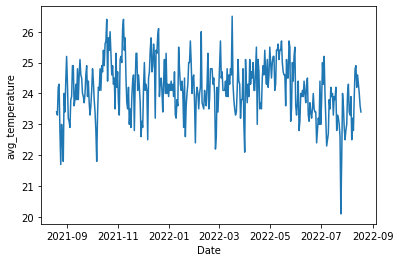

In [46]:
sns.lineplot(x = 'Date', y='avg_temperature', data=weather_df);

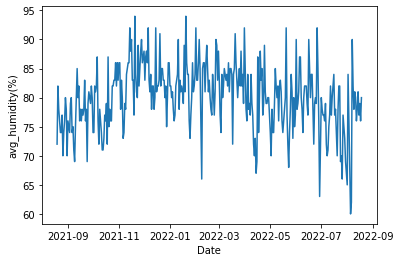

In [48]:
sns.lineplot(x = 'Date', y='avg_humidity(%)', data=weather_df);